In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#tf.debugging.set_log_device_placement(True)

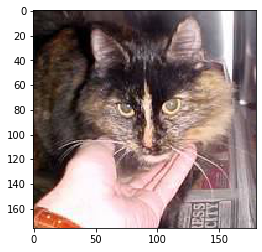

In [ ]:
image = plt.imread("D:\python_practise_deeplearning\data\\train\cats\cat.60.jpg")
plt.imshow(image)

In [2]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape =(256,256,3)),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides = (2,2)),
    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides = (3,3)),
    tf.keras.layers.Conv2D(512, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(512, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(512, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides = (3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
# YOUR CODE HERE
])
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       7

In [2]:
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs = {}):
#         if(logs.get('acc') >= 0.99):
#             print("\n accuracy reached")
#             self.model.stop_training = True

train_dir = "/content/drive/My Drive/Dataset/CAT_V_DOG/data/train"
test_dir = "/content/drive/My Drive/Dataset/CAT_V_DOG/data/test"

train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest'
                                  )
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (256, 256),
                                                   batch_size = 128,
                                                   class_mode = 'binary')
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size = (256, 256),
                                                   batch_size = 128,
                                                   class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:

#callbacks = myCallback()
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("/content/drive/My Drive/Dataset/CAT_V_DOG/cat_V_dog_dropout_16-07_tf", save_best_only = True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

history = model.fit(train_generator,
                    epochs=20,
                    verbose=1,
                    callbacks = [checkpoint_cb, early_stopping_cb],
                    validation_data=test_generator, workers = 32)

Epoch 1/20
157/157 [==============================] - ETA: 0s - loss: 0.7278 - acc: 0.5666WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Dataset/CAT_V_DOG/cat_V_dog_dropout_16-07_tf/assets
157/157 [==============================] - 942s 6s/step - loss: 0.7278 - acc: 0.5666 - val_loss: 0.7064 - val_acc: 0.5000
Epoch 2/20
157/157 [==============================] - 379s 2s/step - loss: 0.6215 - acc: 0.6567 - val_loss: 0.6812 - val_acc: 0.5118
Epoch 3/20
157/157 [==============================] - 389s 2s/step - loss: 0.5720 - acc: 0.7117 - val_loss: 0.6617 - val_acc: 0.5484
Epoch 4/20
157/157 [==============================] - 

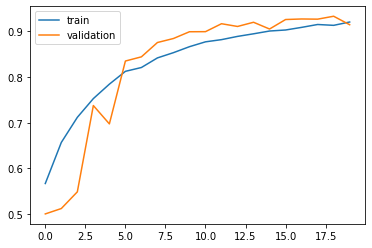

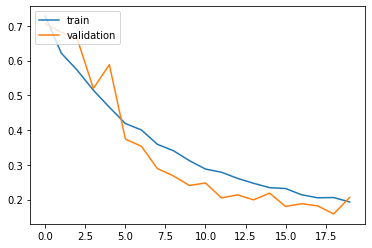

In [12]:
# for model0

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [13]:
tf.keras.models.save_model(model, filepath = '/content/drive/My Drive/Dataset/CAT_V_DOG/cat_V_dog_dropout_16-07_test_save_as_tf', save_format = 'tf')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Dataset/CAT_V_DOG/cat_V_dog_dropout_16-07_test_save_as_tf/assets


In [3]:
model_1 = tf.keras.models.load_model('/content/drive/My Drive/Dataset/CAT_V_DOG/cat_V_dog_dropout_16-07_tf', compile = False)

In [5]:
adam_1 = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_1.compile(optimizer=adam_1, loss='binary_crossentropy', metrics=['acc'])
checkpoint_cb_1 = tf.keras.callbacks.ModelCheckpoint("/content/drive/My Drive/Dataset/CAT_V_DOG/cat_V_dog_dropout_16-07_tf_model_1", save_best_only = True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

history_1 = model_1.fit(train_generator,
                        epochs=10,
                        verbose=1,
                        callbacks = [checkpoint_cb_1, early_stopping_cb],
                        validation_data=test_generator, workers = 32)

Epoch 1/10
157/157 [==============================] - ETA: 0s - loss: 0.2028 - acc: 0.9176WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Dataset/CAT_V_DOG/cat_V_dog_dropout_16-07_tf_model_1/assets
157/157 [==============================] - 391s 2s/step - loss: 0.2028 - acc: 0.9176 - val_loss: 0.5020 - val_acc: 0.7708
Epoch 2/10
157/157 [==============================] - 386s 2s/step - loss: 0.1910 - acc: 0.9211 - val_loss: 0.1981 - val_acc: 0.9172
Epoch 3/10
157/157 [==============================] - 380s 2s/step - loss: 0.1788 - acc: 0.9256 - val_loss: 0.2831 - val_acc: 0.8834
Epoch 4/10
157/157 [==========================

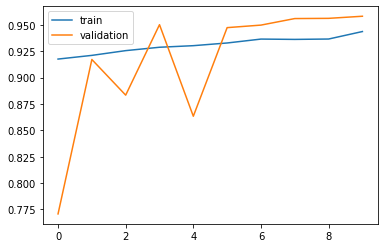

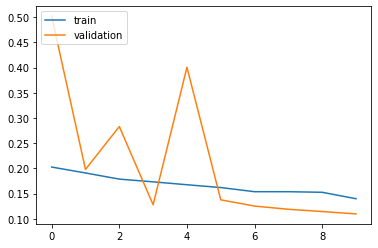

In [8]:
#For model_1
plt.plot(history_1.history['acc'])
plt.plot(history_1.history['val_acc'])
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
# The model is trained to 95.8% accuracy on validation set

In [9]:
#Training 2
model_2 = tf.keras.models.load_model('/content/drive/My Drive/Dataset/CAT_V_DOG/cat_V_dog_dropout_16-07_tf_model_1', compile = False)

In [10]:
adam_2 = tf.keras.optimizers.Adam(learning_rate=0.00001)
model_2.compile(optimizer=adam_2, loss='binary_crossentropy', metrics=['acc'])
checkpoint_cb_2 = tf.keras.callbacks.ModelCheckpoint("/content/drive/My Drive/Dataset/CAT_V_DOG/cat_V_dog_dropout_16-07_tf_model_2", save_best_only = True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history_2 = model_2.fit(train_generator,
                        epochs=10,
                        verbose=1,
                        callbacks = [checkpoint_cb_2, early_stopping_cb],
                        validation_data=test_generator, workers = 32)

Epoch 1/10
157/157 [==============================] - 380s 2s/step - loss: 0.1118 - acc: 0.9551 - val_loss: 0.1150 - val_acc: 0.9532
Epoch 2/10
157/157 [==============================] - 380s 2s/step - loss: 0.1076 - acc: 0.9563 - val_loss: 0.0964 - val_acc: 0.9614
Epoch 3/10
157/157 [==============================] - 371s 2s/step - loss: 0.1031 - acc: 0.9585 - val_loss: 0.0995 - val_acc: 0.9594
Epoch 4/10
157/157 [==============================] - 369s 2s/step - loss: 0.1040 - acc: 0.9581 - val_loss: 0.1007 - val_acc: 0.9584
Epoch 5/10
157/157 [==============================] - 381s 2s/step - loss: 0.0960 - acc: 0.9617 - val_loss: 0.0963 - val_acc: 0.9656
Epoch 6/10
157/157 [==============================] - 389s 2s/step - loss: 0.0990 - acc: 0.9607 - val_loss: 0.1021 - val_acc: 0.9570
Epoch 7/10
157/157 [==============================] - 389s 2s/step - loss: 0.0973 - acc: 0.9606 - val_loss: 0.0910 - val_acc: 0.9680
Epoch 8/10
157/157 [==============================] - 382s 2s/step - 

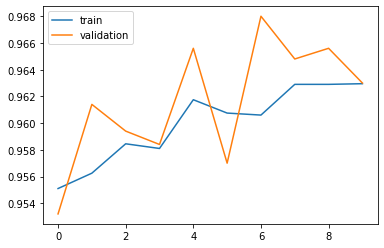

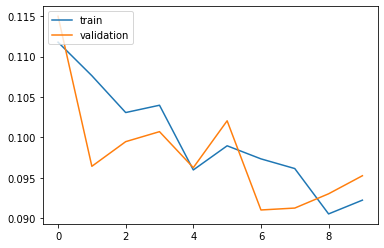

In [11]:
#For model_2
plt.plot(history_2.history['acc'])
plt.plot(history_2.history['val_acc'])
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [12]:
#Training 3
model_3 = tf.keras.models.load_model('/content/drive/My Drive/Dataset/CAT_V_DOG/cat_V_dog_dropout_16-07_tf_model_2', compile = False)
adam_3 = tf.keras.optimizers.Adam(learning_rate=0.000001)
model_3.compile(optimizer=adam_3, loss='binary_crossentropy', metrics=['acc'])
checkpoint_cb_3 = tf.keras.callbacks.ModelCheckpoint("/content/drive/My Drive/Dataset/CAT_V_DOG/cat_V_dog_dropout_16-07_tf_model_3", save_best_only = True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history_3 = model_3.fit(train_generator,
                        epochs=10,
                        verbose=1,
                        callbacks = [checkpoint_cb_3, early_stopping_cb],
                        validation_data=test_generator, workers = 32)

Epoch 1/10
157/157 [==============================] - 390s 2s/step - loss: 0.0940 - acc: 0.9633 - val_loss: 0.0905 - val_acc: 0.9658
Epoch 2/10
157/157 [==============================] - 389s 2s/step - loss: 0.0883 - acc: 0.9639 - val_loss: 0.0930 - val_acc: 0.9634
Epoch 3/10
157/157 [==============================] - 386s 2s/step - loss: 0.0875 - acc: 0.9645 - val_loss: 0.0909 - val_acc: 0.9654
Epoch 4/10
157/157 [==============================] - 399s 3s/step - loss: 0.0891 - acc: 0.9642 - val_loss: 0.0904 - val_acc: 0.9668
Epoch 5/10
157/157 [==============================] - 392s 2s/step - loss: 0.0894 - acc: 0.9637 - val_loss: 0.0919 - val_acc: 0.9642
Epoch 6/10
157/157 [==============================] - 389s 2s/step - loss: 0.0908 - acc: 0.9632 - val_loss: 0.0912 - val_acc: 0.9652
Epoch 7/10
157/157 [==============================] - 392s 2s/step - loss: 0.0890 - acc: 0.9645 - val_loss: 0.0931 - val_acc: 0.9618


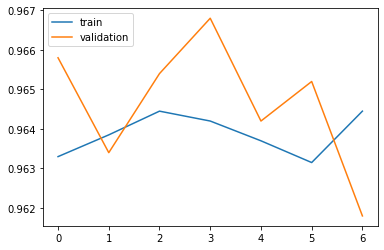

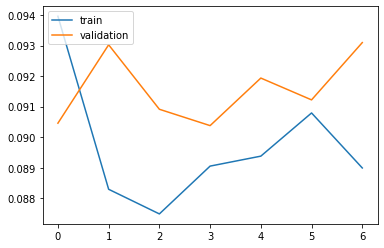

In [13]:
#For model_3
plt.plot(history_3.history['acc'])
plt.plot(history_3.history['val_acc'])
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()